In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from math import cos, sin
%matplotlib notebook

face3d = np.load('f3d_68_pts.npy')
print(face3d.shape)

(3, 68)


<IPython.core.display.Javascript object>


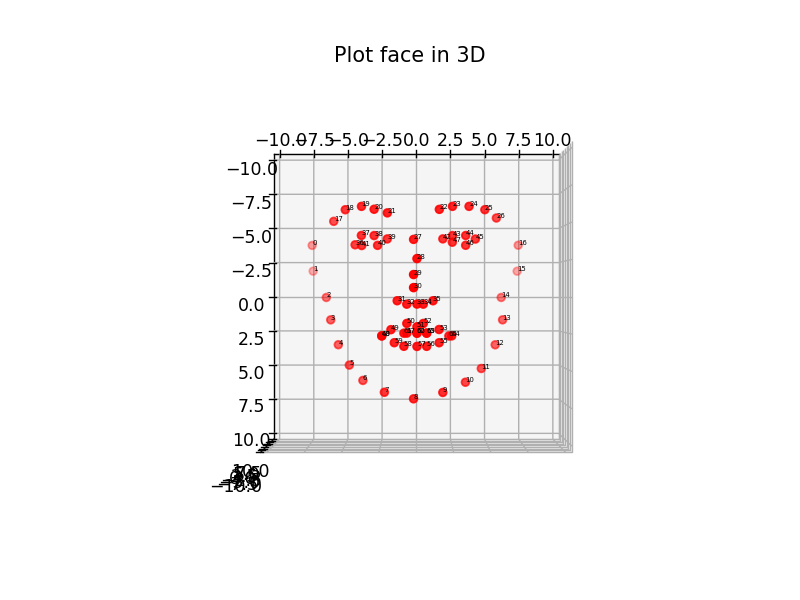

Text(0.5, 0.92, 'Plot face in 3D')

In [2]:
# TODO 1: Draw the 3D facial landmarks.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(face3d[0],face3d[1],face3d[2],c='r',marker='o')
#設定仰角
ax.view_init(elev=-90,azim=-90)
#plot text in points
for i in range(68):
    ax.text(face3d[0][i], face3d[1][i], face3d[2][i], str(i),fontsize=4)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
plt.show()
plt.title('Plot face in 3D')
# enter your code here

In [3]:
# TODO 2: Computer the Euclidean distance between inner eyes.
p1,p2=face3d[:,39],face3d[:,42]
dists=np.sqrt(np.sum((p1-p2)**2))
print(dists)
# enter your code here

3.8358011


<IPython.core.display.Javascript object>


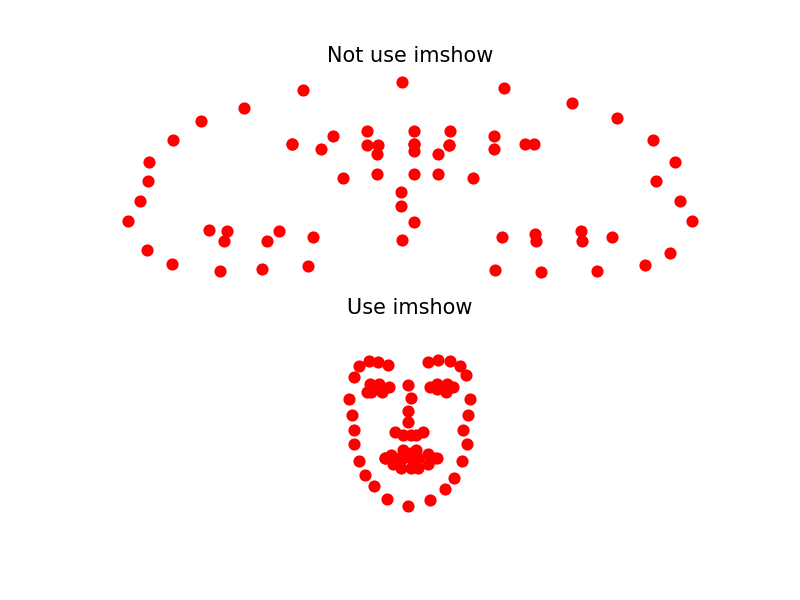

(-0.5, 639.5, 479.5, -0.5)

In [4]:
# TODO 3: 3D-to-2D Projection.
# Step 3.1: Construct the intrinsic matrix K.
k=np.array([[640,0,320],[0,640,240],[0,0,1]])
# Step 3.2: Contruct the extrinsic matrix [R,t].
R=np.eye(3)
t=[[0],[0],[30]]
extrinsic=np.hstack((R,t))
# Step 3.3: Construct the 2D projection matrix m.
mi=np.vstack((face3d,np.ones((1,face3d.shape[1]))))
Mi=k@extrinsic@mi
face2d=np.vstack((Mi[0]/Mi[2],Mi[1]/Mi[2]))
# Step 3.4: Plot matrix m.
plt.figure()
plt.subplot(2,1,1)
plt.scatter(face2d[0],face2d[1],c='r')
plt.title('Not use imshow')
plt.axis('off')
# Step 3.5: Plot matrix m with imshow.

plt.subplot(2,1,2)
white_image = np.full((480,640,3),255)
plt.scatter(face2d[0],face2d[1],c='r')
plt.imshow(white_image)
plt.title('Use imshow')
plt.axis('off')
# enter your code here

In [5]:
# Question 1: Why is the orientation of the face in Figure 2 different from that in Figure 3?
'''
因為兩張圖用不同的坐標系。
上圖使用的是笛卡爾坐標系，原點(0,0)在左下角，臉部的方向是下巴在底部，頭頂在圖的頂部，所以看起來像是一個倒著的臉。
下圖使用的是imshow，原點(0,0)在左上角，臉部的方向跟上圖相反。
'''
# enter your answer here

'\n因為兩張圖用不同的坐標系。\n上圖使用的是笛卡爾坐標系，原點(0,0)在左下角，臉部的方向是下巴在底部，頭頂在圖的頂部，所以看起來像是一個倒著的臉。\n下圖使用的是imshow，原點(0,0)在左上角，臉部的方向跟上圖相反。\n'

In [6]:
import math
def roate_matrix(alpha,beta,gamma):
    rz=np.array([
        [cos(math.radians(alpha)),-sin(math.radians(alpha)),0],
        [sin(math.radians(alpha)),cos(math.radians(alpha)) ,0],
        [0,0,1]
    ])
    ry=np.array([
        [cos(math.radians(beta)),0,sin(math.radians(beta))],
        [0,1,0],
        [-sin(math.radians(beta)),0,cos(math.radians(beta))]
    ])
    rx=np.array([
        [1,0,0],
        [0,cos(math.radians(gamma)),-sin(math.radians(gamma))],
        [0,sin(math.radians(gamma)),cos(math.radians(gamma))]
    ])
    return rz@ry@rx
def projection_to_2d(face3d,R):
    k=np.array([[640,0,320],[0,640,240],[0,0,1]])
    t=[[0],[0],[30]]
    extrinsic=np.hstack((R,t))
    mi=np.vstack((face3d,np.ones((1,face3d.shape[1]))))
    Mi=k@extrinsic@mi
    face2d=np.vstack((Mi[0]/Mi[2],Mi[1]/Mi[2]))
    return face2d

<IPython.core.display.Javascript object>


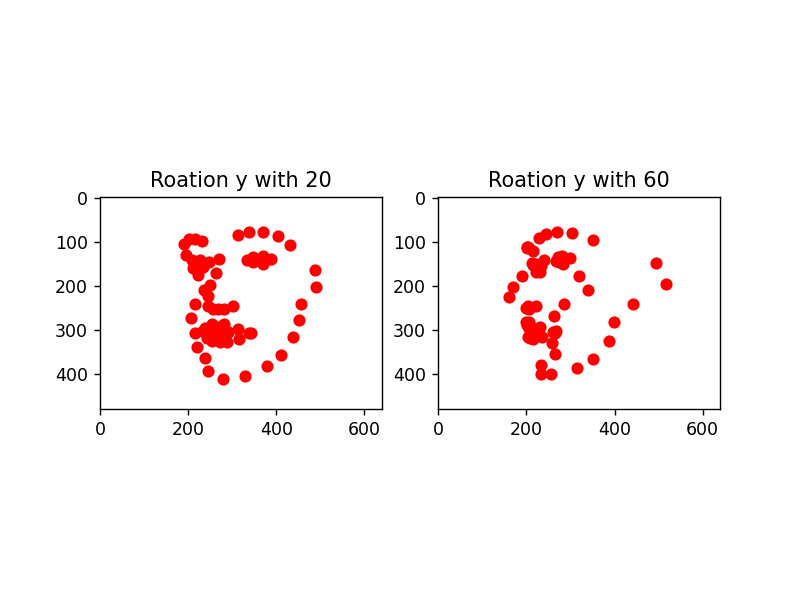

In [7]:
# TODO 4: Repeat Steps 3.1, 3.2, 3.3, 3.5 with different rotation matrices.
R1=roate_matrix(0,20,0)
face2d_1=projection_to_2d(face3d,R1)
plt.figure()
plt.subplot(1,2,1)
white_image = np.full((480,640,3),255)
plt.scatter(face2d_1[0],face2d_1[1],c='r')
plt.imshow(white_image)
plt.title('Roation y with 20')
R2=roate_matrix(0,60,0)
face2d_2=projection_to_2d(face3d,R2)
plt.subplot(1,2,2)
white_image = np.full((480,640,3),255)
plt.scatter(face2d_2[0],face2d_2[1],c='r')
plt.title('Roation y with 60')
plt.imshow(white_image)
# enter your code here

<IPython.core.display.Javascript object>


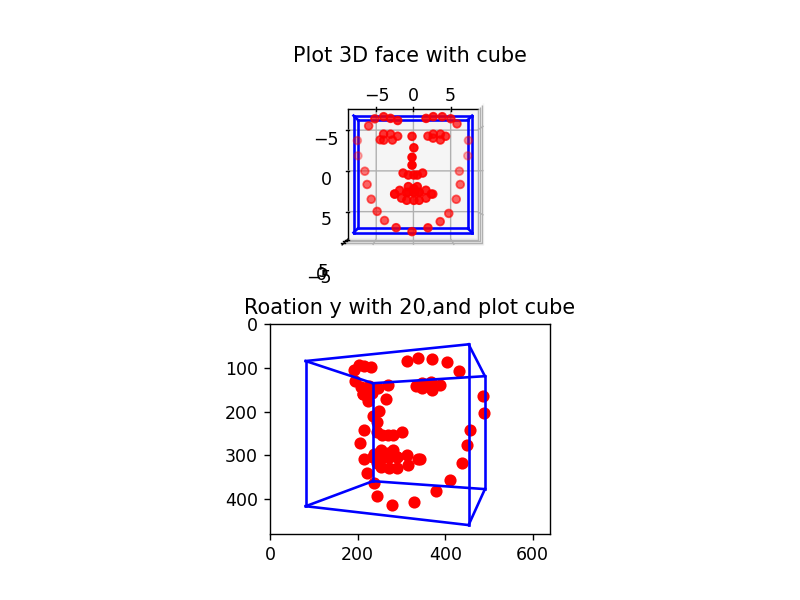

Text(0.5, 1.0, 'Roation y with 20,and plot cube')

In [9]:
# TODO 5: Augmented Reality
# Step 5.1: Construct the eight vertices of the cube containing the 3D facial landmarks
x_min,x_max=np.min(face3d[0]),np.max(face3d[0])
y_min,y_max=np.min(face3d[1]),np.max(face3d[1])
z_min,z_max=np.min(face3d[2]),np.max(face3d[2])
fig = plt.figure()
ax = fig.add_subplot(2,1,1,projection='3d')
ax.scatter3D(face3d[0],face3d[1],face3d[2],c='r',marker='o')
vertices = np.array([[x_min, y_min, z_min],
                     [x_min, y_min, z_max],
                     [x_min, y_max, z_min],
                     [x_min, y_max, z_max],
                     [x_max, y_min, z_min],
                     [x_max, y_min, z_max],
                     [x_max, y_max, z_min],
                     [x_max, y_max, z_max]])
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (1, 5), (2, 3), (2, 6), (3, 7), (4, 5), (4, 6), (5, 7), (6, 7)]
for edge in edges:
    ax.plot(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], c='b')
ax.view_init(elev=-90,azim=-90)
ax.set_xlim([x_min-1,x_max+1])
ax.set_ylim([y_min-1,y_max+1])
ax.set_zlim([z_min-1,z_max+1])
plt.show()
plt.title('Plot 3D face with cube')
# Step 5.2: Follow TODO 4 to project the 3D facial landmarks and the eight vertices of the cube onto the 2D space.
ax2=fig.add_subplot(2,1,2)
cube2d=projection_to_2d(vertices.T,R1)
for edge in edges:
    ax2.plot(cube2d[0, edge], cube2d[1, edge], c='b')
white_image = np.full((480,640,3),255)
ax2.scatter(face2d_1[0],face2d_1[1],c='r')
ax2.imshow(white_image)
plt.title('Roation y with 20,and plot cube')
# enter your code here